<a href="https://colab.research.google.com/github/9-coding/CLIP_AI/blob/main/Classification_ResNet50d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/gdrive/')

path = '/content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge'

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [10]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.7/705.7 kB 10.4 MB/s eta 0:00:00


cuda


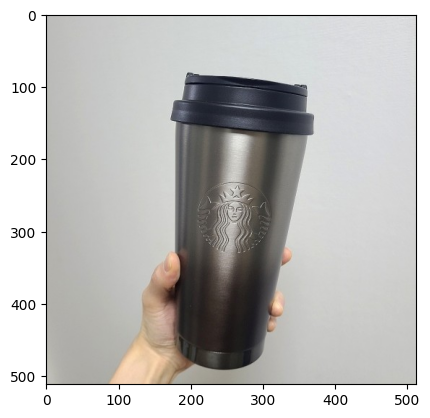

Class: coffee mug


In [30]:
import timm
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import yaml

# GPU 설정
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print(DEVICE)

# 모델 및 이미지 전처리
model_name = 'resnet50d'
model = timm.create_model(model_name, pretrained=True)
num_features = model.fc.in_features

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# 이미지 경로
image_path = path + '/텀블러_1.jpeg'

plt.imshow(plt.imread(image_path))
img = Image.open(image_path)
img = transform(img).unsqueeze(0)
plt.show()

# 모델 평가 모드로 설정
model.eval()

# GPU 또는 CPU로 모델 이동
model = model.to(DEVICE)
img = img.to(DEVICE)

# 추론
with torch.no_grad():
    output = model(img)

predicted_class = torch.argmax(output, dim=1).item()

# YAML 파일 경로
yaml_file = path + '/ImageNet.yaml'

# YAML 파일 읽기
with open(yaml_file, 'r') as f:
    data = yaml.safe_load(f)

# 클래스 목록 읽기
classes = data['names']

# 클래스 번호가 504인 클래스 검색
target_class_number = predicted_class
target_class_name = None
for class_number, class_name in classes.items():
    if int(class_number) == target_class_number:
        target_class_name = class_name
        break

# 검색된 클래스 출력
if target_class_name is not None:
    print(f"Class: {target_class_name}")